In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results = pd.merge(study_results, mouse_metadata, on= "Mouse ID" , how = "left")


# Display the data table for preview
mouse_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.

unique_mice_count = len(mouse_results["Mouse ID"].unique())
unique_mice_count

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= pd.DataFrame(mouse_results, columns = ['Mouse ID', 'Timepoint'])
duplicate_miceIDs = duplicate_mice[duplicate_mice.duplicated()]
duplicate_miceID = duplicate_miceIDs['Mouse ID'].unique()
duplicate_miceID


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_df = mouse_results.loc[mouse_results["Mouse ID"] == duplicate_miceID[0],:]
duplicate_mouseID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_final = mouse_results.loc[mouse_results["Mouse ID"] != duplicate_miceID[0],:]
mouse_results_final.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [17]:
# Checking the number of mice in the clean DataFrame.
newunique_mice_count = len(mouse_results_final["Mouse ID"].unique())
newunique_mice_count

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumorvolume = mouse_results_final.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumorvolume = mouse_results_final.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_tumorvolume = mouse_results_final.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stddev_tumorvolume = mouse_results_final.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumorvolume = mouse_results_final.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
                                   "Mean Tumor Volume": mean_tumorvolume,  
                                    "Median Tumor Volume": median_tumorvolume,
                                    "Tumor Volume Variance" : variance_tumorvolume,
                                    "Tumor Volume Std. Dev." : stddev_tumorvolume,
                                    "Tumor Volume Std. Err." : sem_tumorvolume })

summary_statistics



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_functions = {'Tumor Volume (mm3)':['mean','median','var','std','sem']}
summary_statistics_aggs =mouse_results_final.groupby(['Drug Regimen']).agg(agg_functions)
summary_statistics_aggs

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

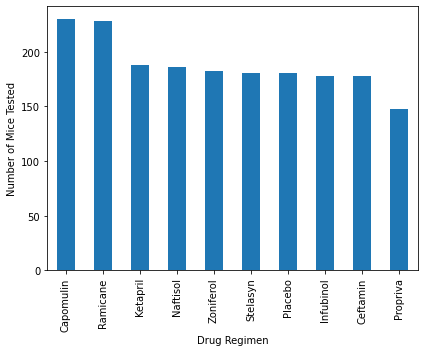

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_groupby= mouse_results_final.groupby('Drug Regimen')
total_timepoints_regimen = timepoints_groupby['Drug Regimen'].count()
sorted_total_timepoints_regimen =total_timepoints_regimen.sort_values(ascending = False)
total_timepoints_chart = sorted_total_timepoints_regimen.plot(kind='bar', figsize =(6,5))
total_timepoints_chart.set_xlabel("Drug Regimen")
total_timepoints_chart.set_ylabel("Number of Mice Tested")

plt.tight_layout()
plt.show()




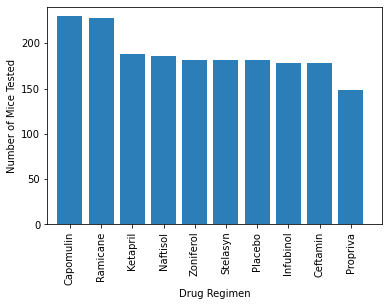

In [180]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis =np.arange( len(timepoints_groupby))
tick_locations=[]
for x in x_axis:
    tick_locations.append(x)
drug_names = []
for drug in sorted_total_timepoints_regimen.index:
    drug_names.append(drug)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xlim(-0.72, len(x_axis))
plt.ylim(0, max(sorted_total_timepoints_regimen)+10 )

plt.bar(x_axis,sorted_total_timepoints_regimen, facecolor = "tab:blue", alpha= 0.95, align = "center" )
plt.xticks(tick_locations,drug_names, rotation = 'vertical')

plt.show()

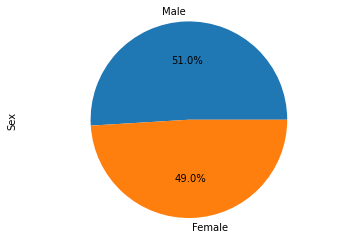

In [205]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_mice = mouse_results_final['Sex'].value_counts()
sex_pie = sex_mice.plot(kind="pie", y =sex_mice, autopct="%1.1f%%")
plt.axis("equal")

plt.show()

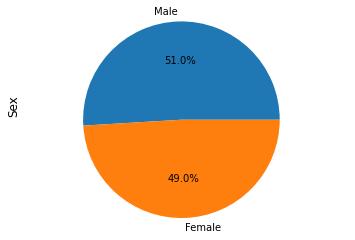

In [198]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex= sex_mice.index
colors =["tab:blue","tab:orange"]

plt.pie(sex_mice, labels=sex, colors =colors, autopct="%1.1f%%",shadow=False)
plt.title("Sex", x=0,y=0.5, rotation = 'vertical')
plt.axis("equal")

plt.show()


## Line and Scatter Plots

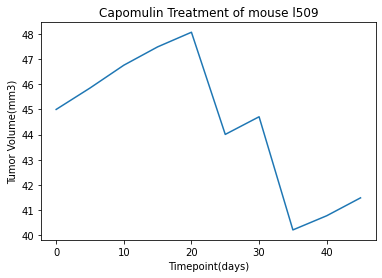

In [233]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_results_I509 = mouse_results_final[(mouse_results_final["Drug Regimen"]=="Capomulin") & (mouse_results_final["Mouse ID"] =="l509")]
tumor_volume = mouse_results_I509["Tumor Volume (mm3)"]
timepoint = mouse_results_I509["Timepoint"]
line_plot, = plt.plot(timepoint, tumor_volume, color="tab:blue")
plt.title("Capomulin Treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")

plt.show()